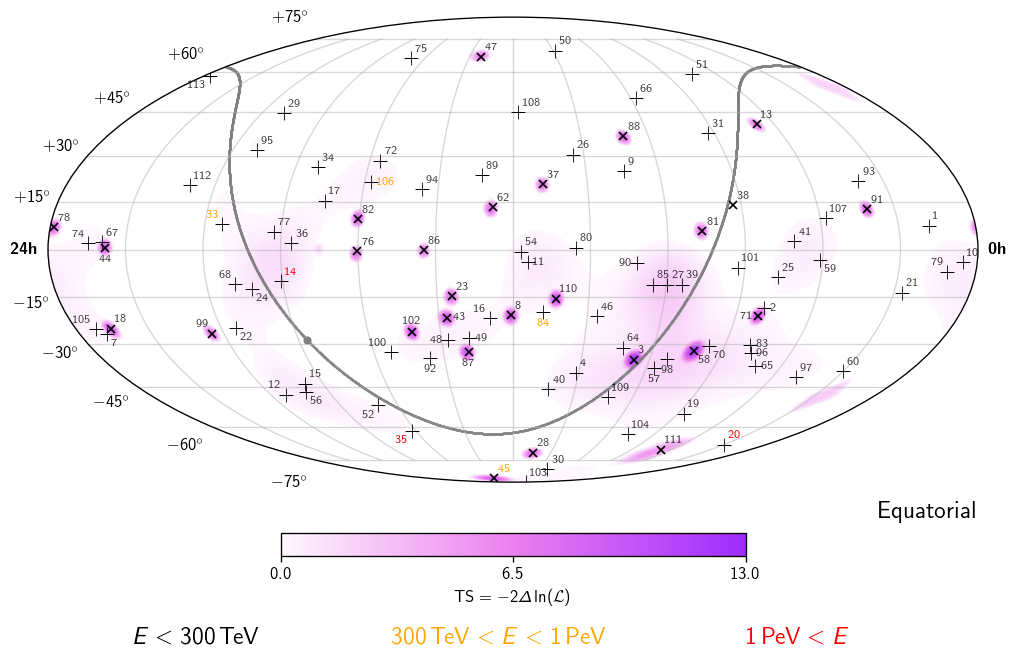

# Diffuse Neutrinos #

IceCube Bootcamp 2022 \\
Madison, WI 

Manuel Silva

# Introduction and Goals #


*  Learn what diffuse neutrinos are and how IceCube actually detects them
*  Review of Poisson statistics and likelihood construction
*  Run your own diffuse fit


![alt text](https://www.researchgate.net/profile/J_Joutsenvaara/publication/304487324/figure/fig5/AS:492577876123650@1494451126031/Neutrino-energy-ranges-and-their-relative-intensities-according-to-their-source-of_W640.jpg)



# Summary of diffuse neutrino fluxes for all energy ranges. 

- Cosmological neutrinos are neutrinos left over from the Big Bang
- Solar neutrinos are byproducts of nuclear fusion reactions in the stellar core
- Atmospheric neutrinos are created when cosmic rays bombard our atmosphere
- Astrophysical neutrinos are created near cosmic accelarator sites along with cosmic rays
- GZK neutrinos are created when ultra high energy protons interact with the cosmic microwave background, the highest energy neutrinos in the universe!



# Diffuse Neutrinos #

*  Diffuse neutrinos are neutrinos that do not arrive at Earth from any particular source (isotropic), they are the total neutrinos that IceCube eventually detects
*  To understand the data, you will need to model all of physics simultaneously, then "fit" the physics models to the data
    *  The most generic astrophysical flux model ($\Phi_\textrm{astro}$) is the single power law , this is parametrized with an astrophysical spectral index γ and overall astrophysical normalization $\phi_{0}$ as: 

   $  Φ = \phi_{0} \times (\frac{E}{100TeV})^{-γ} $
    
    * Your data sample also contains atmospheric neutrinos. Atmospheric neutrino fluxes are complex and cannot be easily modeled via simple parametric functions, therefore it is usually included in your fit as some sort of scaling parameter ($ \phi_\textrm{atmos}$):

  $ \Phi_\textrm{atmos} = \phi_\textrm{atmos} \times \Phi_\textrm{Gaisser} $
    
*  As an experimentalist, our job is to interpret the data and publish it. Once published, theorist can take our data and create their own models.

* If you are interested in studying astrophysical neutrinos, it is possible that there are too many atmospheric neutrinos in your data. To overcome this, we need data analysis techniques that take advantage of properties of these events. 

# Observable #1 - Energy #

*  The astrophyiscal and atmospheric neutrino fluxes are highly dependent on energy, we must therefore have a good understanding of how we esimate the energy of the neutrinos in our detector
*  Recall that IceCube doesn't detect energy, it measures the light/charge deposited in each DOM
  * Use a reconstruction algorithim to convert the light into energy, [summary of published algorithims](https://arxiv.org/pdf/1311.4767.pdf)
  * Some algorithims are optimized to reconstruct the energy of a track, others for cascades, etc...
*  This is our **first observable**

# Observable #2 - Zenith #

*  Atmospheric neutrino flux is higly dependent on zenith, but astrophysical flux is isotropic
  *  Your event selection may reject events depending on the direction, so it is essential that you reconstruct the direction correctly
* You can use the light deposited in IceCube, along with timing information, to predict the direction of the neutrinos
    *  Use a reconstruction algorithim to convert light and timing to direction, [summary of published algorithims](https://arxiv.org/pdf/astro-ph/0407044v1.pdf)
* There are dedicated algorithims for tracks, cascades, etc...
*  This is our **second observable**

# Observable - Zenith #

* Neutrinos need to traverse large amounts of Earth rock for large zeniths ($\Theta > 80^{\cdot}$)
* For small zeniths ($\Theta < 80^{\cdot}$), neutrinos only need to travel through ice
![alt text](https://icecube.wisc.edu/~msilva/BootCamp_2019/IceCube_zeniths.png)



# Observable #3 - Flavor #
*  Neutrinos can interact with protons/neutrons in the ice via electroweak interaction
  * Neutral current (top) or charged current (bottom) deep-inelastic scattering dominates at these energies
  *  Cannot extract information about the neutrino flavor from neutral currents since all neutrino flavors produce similar hadronic cascades
  *  Eletrons produce electromagnetic cascades, muons produce tracks,  taus produce a "double-bang" (~18% taus produce a track)
* It is very difficult to identify hadronic cascades from a neutral current interaction versus an electromagnetic cascades from electron-neutrinos chraged current interaction, so for today they are classified as the same

  
![alt text](https://icecube.wisc.edu/~msilva/BootCamp_2019/Diagrams.png)

# Observable #3 - Topology #
  
* Since we can't technically differentiate between electron neutrino and all other neutrino's hadronic cascade, we instead refer to this obserable as "topology"

![alt text](https://icecube.wisc.edu/~msilva/BootCamp_2019/EventTopologies.png)

# Observables - Summary #
*  For today's example, lets stick to using **energy, zenith, and topology as our observables **
*  Hopefully, you will be able to repurpose your code in the future if you ever need different observables

# Counting Statistics #

Consider a detector that counts particles. 

If our expectation of the rate (counts/s) is fixed over a given interval, and each count is independent of the previous or next one, the probability of seeing a count of **k** particles in your detector follows a poisson distribution.

The number of particles we detect in a time **t** is a random variable.

The probability, of detecting **k** counts when expecting **$\lambda$** counts in time **t** is : 


$P(k | \lambda)=\frac{\lambda^{k} e^{-\lambda}}{k !}$




In [4]:
#In code form
def poisson(k, l):
    return (l**k * np.exp(-l))/np.math.factorial(k)

In [2]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

# What does this look like #

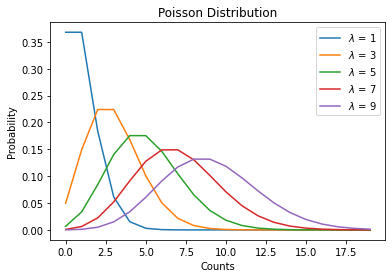

In [5]:
l = range(1, 10)[::2]

for i in range(len(l)):
    probs  = [poisson(k, l[i]) for k in range(0,20)]
    plt.plot(range(0,20), probs, label='$\\lambda$ = %s'%(str(l[i])))

plt.xlabel('Counts')
plt.ylabel('Probability')
plt.title('Poisson Distribution')
plt.legend()
plt.show()

# Why is this useful? #

Collect IceCube data for a set amount of time, 1 year or maybe 10 years.
What you have is a *detected* number of neutrinos (now referred to as an event), and you often try to estimate the *true* expectation.

Let use math to descibe this now: the likelihood of $ \lambda $ -expected events given k-detected events is: 

$\Large \mathcal{L}(\lambda | k) =   P(k | \lambda)=\frac{\lambda^{k} e^{-\lambda}}{k !}$


Given that you have already seen **k** events in your detector, then we can estimate the true expectation with whatever value **maximizes** the probability that you will detect that many events. (eg scan $\lambda$ to maximize $\Large \mathcal{L}$).





# Let's fit some toy data # 


- To do this, you'll need to load this file: **toy_data_E-2.npy**

    1) Download from: /home/icecube-bootcamp/bootcamp2022/diffuse_exercise/toy_data_E-2.npy
   

- We are going to make some assumptions: 

    1) We have a spherical detector hovering in vacuum somehwere in deep space.
    
    2) Our detector is perfect (no systematics uncertainties)
        
    3) We have prior knowledge of the incoming flux which is, conveniently, a simple power law defined as:   $ \Phi_{0} \times \textrm{E}^{-\gamma}$ 
    
    *where gamma is the spectral index, and it's known in this case to be ($\gamma$ = 2)
    
    4) We have been taking data continuously for ~100 years.
    
    
- Our goal is to fit for the normalization $\Phi_0$

In [6]:
data = np.load('/home/icecube-bootcamp/bootcamp2022/diffuse_exercise/toy_data_E-2.npy')

bins = np.logspace(3, 6, 10)
centers = (bins[1:] + bins[:-1])/2.
h = np.histogram(data, bins=bins)
plt.step(centers, h[0], where='mid', label='data')
plt.semilogy(nonposy='clip')
plt.semilogx()
plt.xlabel('Energy (GeV)')
plt.ylabel('Counts')
plt.legend()
plt.show()

FileNotFoundError: ignored

- Now that we have our data, we can define the likelihood function, $\mathcal{L}$ :


$ \Large \mathcal{L}(\vec{\theta} | \vec{d})=\prod_{i} \frac{\left(\lambda_{i}\right)^{k_{i}} e^{-\lambda_{i}}}{k_{i} !}$


The only difference between the likelihood and the probability we defined earlier is that now you're taking into account that you have several bins. So you have an expectation $\lambda_{i}$ and an observed value $k_{i}$ in every bin "$i$" 

It's often easier to work with the negative log-likelihood function, which is just  - log($\mathcal{L}$) (any idea why?): 

$ \Large \log \mathcal{L}(\theta | \vec{d})=\sum_{i} k_{i} \cdot \log \left(\lambda_{i}\right)-\lambda_{i}-\Gamma\left[k_{i}+1\right]$


We want to maximize the probability that a certain expectation gives us the observed dataset. So we can maximize log($\mathcal{L}$)  (or minimize negative log($\mathcal{L}$))

We will now define a function that returns our expectation in a certain bin, and another one that evaluates the likelihood.

The **expectation** or number of events
in a bin i is:

$ \Large \lambda_i$ = $\Phi_0~ \int_{E_i} \frac{dN}{dE} dE$

In [7]:
years = 365.*86400. #seconds
livetime = 100.*years
effA = 1e4 #cm^2 (cross-section of interaction * number of targets)

def expectation(phi_0, i):
    return phi_0*(1./(bins[i]) - 1./(bins[i+1]))*livetime*effA

#We are given the spectral index, so our only free parameter in this case is the normalization $\Phi_0$
def log_likelihood(data, phi_0):
    llh = []
    for i in range(len(data)):
        llh.append(-(data[i] * np.log(expectation(phi_0, i)) - expectation(phi_0, i) - special.loggamma(data[i]+1)))

    llh = np.sum(np.asarray(llh)).real
    return llh

# We have our likelihood! # 

Two most common ways to minimize our likelihood.

1) The easy way is to scan your likelihood function and pick out the minimum. 
This can get computationally expensive and near impossible for large datasets with many free parameters

2) The better way is to use a *minimizer*. Minimizers are algorithms developed specifically to find the minima of a given function across an arbitrary number of dimensions

# Lets start by scanning our likelihood #

In [8]:
phis = np.logspace(-8, -4, 50)
profile = [log_likelihood(h[0], phi) for phi in phis]
plt.plot(phis, profile)
plt.xlabel('$\Phi_0$ [GeV$^{-1}$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.ylabel('- llh value', fontsize=16)
plt.loglog()

NameError: ignored

In [ ]:
norm_scanned = phis[np.where(profile == min(profile))[0][0]]
print ("minimized llh found at \Phi_0 = " + str(norm_scanned))

# Let's use a minimizer #

In [ ]:
import scipy.optimize as sp

In [ ]:
results = sp.minimize(lambda x: log_likelihood(h[0], *x),
                           [3.e-7],
                           method='L-BFGS-B',
                           bounds=[[0,None]])

print(results)
norm_min = results.x[0]

In [ ]:
print('Percent difference between minmizer and scanned value:%2.1f %%'%((norm_min - norm_scanned)/(norm_min) * 100.))

The scanned value was ~10 percent different from the minimized value. 

The accuracy from the 1-dimensional scan depends on how many points you actually test. If we run more points, the minimum eventually converges. What happens if you test 1000 points? What about 1000 points with 2-dimensions? What about 10-dimensions?

# Now we can plot our fitted function against the data#

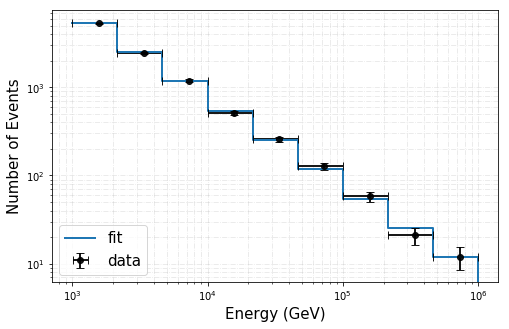

In [ ]:
def power_law(norm, E):
  return norm*E**(-2)


bins = np.logspace(3, 6, 10)
centers = (bins[1:] + bins[:-1])/2.
lower = centers - bins[:-1] 
upper = bins[1:] - centers
xerr = np.array([lower, upper])

norm = norm_min
dats = [expectation(norm_min, i) for i in range(len(centers))]

plt.figure(figsize=[8,5])
plt.step(bins, np.asarray(dats + [0]), where='post',linewidth=2, label='fit')
plt.errorbar(centers, h[0], xerr=xerr, yerr=(np.sqrt(h[0])),capsize=4,fmt='o',color='k',alpha=0.9,label='data',linewidth=2)
plt.semilogy(nonposy='clip')
plt.semilogx()
plt.legend(fontsize=15, loc='lower left', fancybox = True)
plt.grid(ls='-.',which='both',alpha=0.3)
plt.xlabel('Energy (GeV)',fontsize=15)
plt.ylabel('Number of Events', fontsize=15)
plt.show()

# Congratulations! You have performed your first icecube binned likelihood analysis!#

Many thanks to Ibrahim Safa for his help designing the example!